<a href="https://colab.research.google.com/github/arvindh123/Auto-Rename-With-File-Created-Date-Time/blob/master/gradient-boost/predict_it1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
import seaborn as sn

In [ ]:
sdf = pd.read_csv('2021-05-16-14-32_influxdb_data_prepared.csv')
sdf.head()

,_time,time,time.1,hour of the time,minute of the time,minute of the day,weekday,week num of year,_value
0,2021-05-04T04:00:00Z,2021-05-04 04:00:00,2021-05-04 04:00:00,4,0,240,3,19,24
1,2021-05-04T04:05:00Z,2021-05-04 04:05:00,2021-05-04 04:05:00,4,5,245,3,19,20
2,2021-05-04T04:10:00Z,2021-05-04 04:10:00,2021-05-04 04:10:00,4,10,250,3,19,21
3,2021-05-04T04:15:00Z,2021-05-04 04:15:00,2021-05-04 04:15:00,4,15,255,3,19,21
4,2021-05-04T04:20:00Z,2021-05-04 04:20:00,2021-05-04 04:20:00,4,20,260,3,19,20


In [ ]:
X = sdf.iloc[:, 3:-2].values
y = sdf.iloc[:, -1].values

In [ ]:
print(X)

[[   4    0  240    3]
 [   4    5  245    3]
 [   4   10  250    3]
 ...
 [  18   15 1095    1]
 [  18   20 1100    1]
 [  18   25 1105    1]]


In [ ]:
print(y)

[24 20 21 ... 24 24 23]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn import  ensemble
regressor = ensemble.GradientBoostingRegressor(n_estimators = 1000)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[413.95 436.  ]
 [ 27.88  15.  ]
 [ 23.55  30.  ]
 ...
 [380.52 389.  ]
 [ 88.62 148.  ]
 [ 14.42  16.  ]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)  

0.9856285509799368

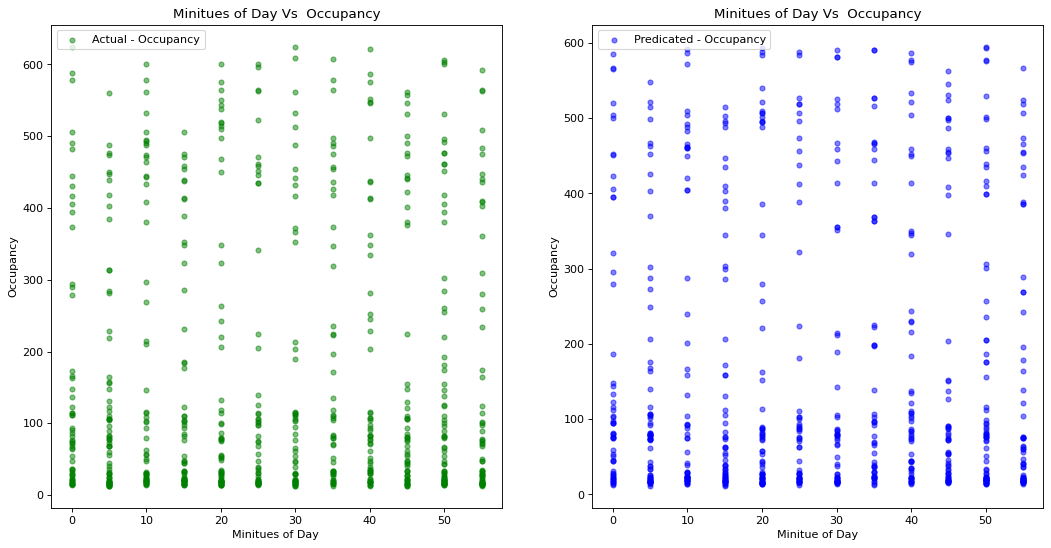

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax1.scatter(X_test[:,1], y_test, s=20, c='g', marker="o", label='Actual - Occupancy',alpha=0.5)
plt.legend(loc="upper left")
plt.title('Minitues of Day Vs  Occupancy')
plt.xlabel('Minitues of Day ')
plt.ylabel('Occupancy')
ax2 = fig.add_subplot(122)
ax2.scatter(X_test[:,1], y_pred, s=20, c='b', marker="o", label='Predicated - Occupancy',alpha=0.5)
plt.legend(loc="upper left")
plt.title('Minitues of Day Vs  Occupancy')
plt.xlabel('Minitue of Day')
plt.ylabel('Occupancy')
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)
ax1.scatter(X_test[:,], y_test, s=20, c='g', marker="o", label='Actual - Occupancy',alpha=0.5)
plt.legend(loc="upper left")
ax2 = fig.add_subplot(111)
ax2.scatter(X_test[:,1], y_pred, s=20, c='b', marker="o", label='Predicated - Occupancy',alpha=0.5)
plt.legend(loc="upper left")
plt.title('Minitues of Day Vs  Occupancy')
plt.xlabel('Minitue of Day')
plt.ylabel('Occupancy')
plt.show()

In [ ]:
print(X_test[:,2] * X_test[:,3])

[5970 4200 1960  750 1010 1325 3975 1385 9555 6965 6030 8070 3750 1095
 2520 7650  525 2730 1395 1070 7050 2200 2260 7950  360 1325 1620 5040
 5880  150 6150 7420 9975 4200 7290  305 8925  550  295 3570 3570 3760
 2570 6780 9940 6210 3400 2620  160 1025 5460 2850 2490 1180  540 8040
 6825  930 6875  595 4450 3000  190 4550 2765 2760 6500 1800 1860 9310
 1175  880 2120 5725  960 4500 2750 7560  420 4620 1330 3560 2475 3120
 9135  860 2540 3500 1085  630 1410 1020 5580  525 8960 1560 1215 2630
  130 2500 3720  725 1090 1020 1305 2700 4795 5625 2130 1720  945  460
  280 5720 6545  125 1890 5460 5790 9450 2075 1775 3680 1320 2780 6780
 6930 1350 6540 2350 1320 6545  525 2040 6200 1100 5540  400  960 1650
  690 9310  750 1420 2225  455 3495 1855 1740 5000 7080  425 2490  670
 1120 1475    0  520 3600 2800 6175 4640  105 1350  925 7210 1160 3330
 2325 3395 2400 6755 9345 1065 3920 2840 4980 4800 7125 1050 4540  735
 4660  215 5145 7620 4625 1900 1000 7735 2880 3660 2175 1360 4125 1085
 3450 